# Datos de la Bolsa de Madrid

In [1]:
#Importamos la Librerias
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Enlace de la Bolsa Madrid
url="https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000"
path='csv/bolsaMadrid.csv'

In [3]:
#Haremos el request a esa ruta
#Procesamos el HTML mediante BeautifulSoap
req = requests.get(url).text
soup = BeautifulSoup(req, "lxml")

# Tabla

In [4]:
# Obtenemos la tabla por un ID específico
table = soup.find("table", {"id":"ctl00_Contenido_tblAcciones"})

In [5]:
name=""
price=""
diferencia=""
maximo=""
minimo=""
numRow=0

for row in table.find_all("tr"):
  numCell=0
  for cell in row.find_all("td"):
    if numCell == 0:
      name=cell.text
      print("Accion:", name)

    if numCell == 1:
      price=cell.text
      print("Cierre:", price)

    if numCell == 2:
      diferencia=cell.text
      print("Diferencia:", diferencia)

    if numCell == 3:
      maximo=cell.text
      print("Maximo:", maximo)
      
    if numCell == 4:
      minimo=cell.text
      print("Minimo:", minimo,'\n')
    numCell+=1
  numRow+=1    
  

  #Creamos el CSV
  with open(path, 'a',  newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, price, diferencia, maximo, minimo, datetime.now()])
  csv_file.close()
df = pd.read_csv(path)

Accion: ACCIONA
Cierre: 159,5000
Diferencia: 0,25
Maximo: 160,6000
Minimo: 157,7000 

Accion: ACERINOX
Cierre: 11,0550
Diferencia: -1,99
Maximo: 11,3100
Minimo: 10,9500 

Accion: ACS
Cierre: 23,1800
Diferencia: 0,48
Maximo: 23,6100
Minimo: 22,7500 

Accion: AENA
Cierre: 146,9500
Diferencia: -0,03
Maximo: 147,9000
Minimo: 145,7500 

Accion: ALMIRALL
Cierre: 12,7100
Diferencia: 0,16
Maximo: 12,7700
Minimo: 12,6000 

Accion: AMADEUS
Cierre: 62,1400
Diferencia: -0,48
Maximo: 62,8200
Minimo: 61,5400 

Accion: ARCELORMIT.
Cierre: 27,6300
Diferencia: -3,04
Maximo: 28,4800
Minimo: 27,3850 

Accion: B.SANTANDER
Cierre: 3,1855
Diferencia: -1,07
Maximo: 3,2020
Minimo: 3,1635 

Accion: BA.SABADELL
Cierre: 0,6794
Diferencia: -0,21
Maximo: 0,6844
Minimo: 0,6722 

Accion: BANKINTER
Cierre: 4,9770
Diferencia: 0,04
Maximo: 4,9770
Minimo: 4,9020 

Accion: BBVA
Cierre: 6,1270
Diferencia: 0,77
Maximo: 6,1860
Minimo: 6,0730 

Accion: CAIXABANK
Cierre: 2,5040
Diferencia: -0,20
Maximo: 2,5160
Minimo: 2,4900 

In [6]:
#Creamos las columnas para el DataFrame
columnsName = ["Accion", "Cierre", "Diferencia", "Maximo", "Minimo", "Fecha"]
df = df.drop(['Unnamed: 0'], axis=1)
df.columns = columnsName

#Eliminamos Datos NaN
df = df.dropna()

#Convertimos en float
df['Cierre'] = [str(x).replace(',','.') for x in df['Cierre']]
df['Cierre'] = df['Cierre'].astype(float)

df['Diferencia'] = [str(x).replace(',','.') for x in df['Diferencia']]
df['Diferencia'] = df['Diferencia'].astype(float)

df['Minimo'] = [str(x).replace(',','.') for x in df['Minimo']]
df['Minimo'] = df['Minimo'].astype(float)

df['Maximo'] = [str(x).replace(',','.') for x in df['Maximo']]
df['Maximo'] = df['Maximo'].astype(float)



#Ordenamos la columna Precio
df=df.sort_values("Cierre")
df.to_csv(path)
df.shape
df

,Accion,Cierre,Diferencia,Maximo,Minimo,Fecha
0,BA.SABADELL,0.6734,0.57,0.6800,0.6658,2021-11-07 21:07:49.106844
1,MAPFRE,1.9430,1.52,1.9525,1.8950,2021-11-07 21:07:49.136557
2,IAG,2.0950,6.13,2.1000,1.9030,2021-11-07 21:07:49.125938
3,CAIXABANK,2.5060,1.58,2.5270,2.4600,2021-11-07 21:07:49.109256
4,B.SANTANDER,3.2840,1.44,3.3190,3.2150,2021-11-07 21:07:49.106256
5,TELEFONICA,3.7660,2.78,3.8030,3.6480,2021-11-07 21:07:49.148457
6,BANKINTER,4.9670,1.82,5.0040,4.8760,2021-11-07 21:07:49.107462
7,BBVA,6.0260,-0.23,6.1070,5.9970,2021-11-07 21:07:49.108326
8,MELIA HOTELS,6.9060,8.18,6.9100,6.2500,2021-11-07 21:07:49.139110
9,INM.COLONIAL,8.6750,2.18,8.7000,8.3450,2021-11-07 21:07:49.135731


# Mayor Ganancia y Mayor Pérdida

In [7]:
#Calculamos Maximo y minimo
maxGanancia = df['Cierre'].max()
maxPerdida = df['Cierre'].min()
print("Mayor ganancia:", maxGanancia, "\nMayor pérdida:",maxPerdida)

Mayor ganancia: 157.0 
Mayor pérdida: 0.6734


# Gráfico

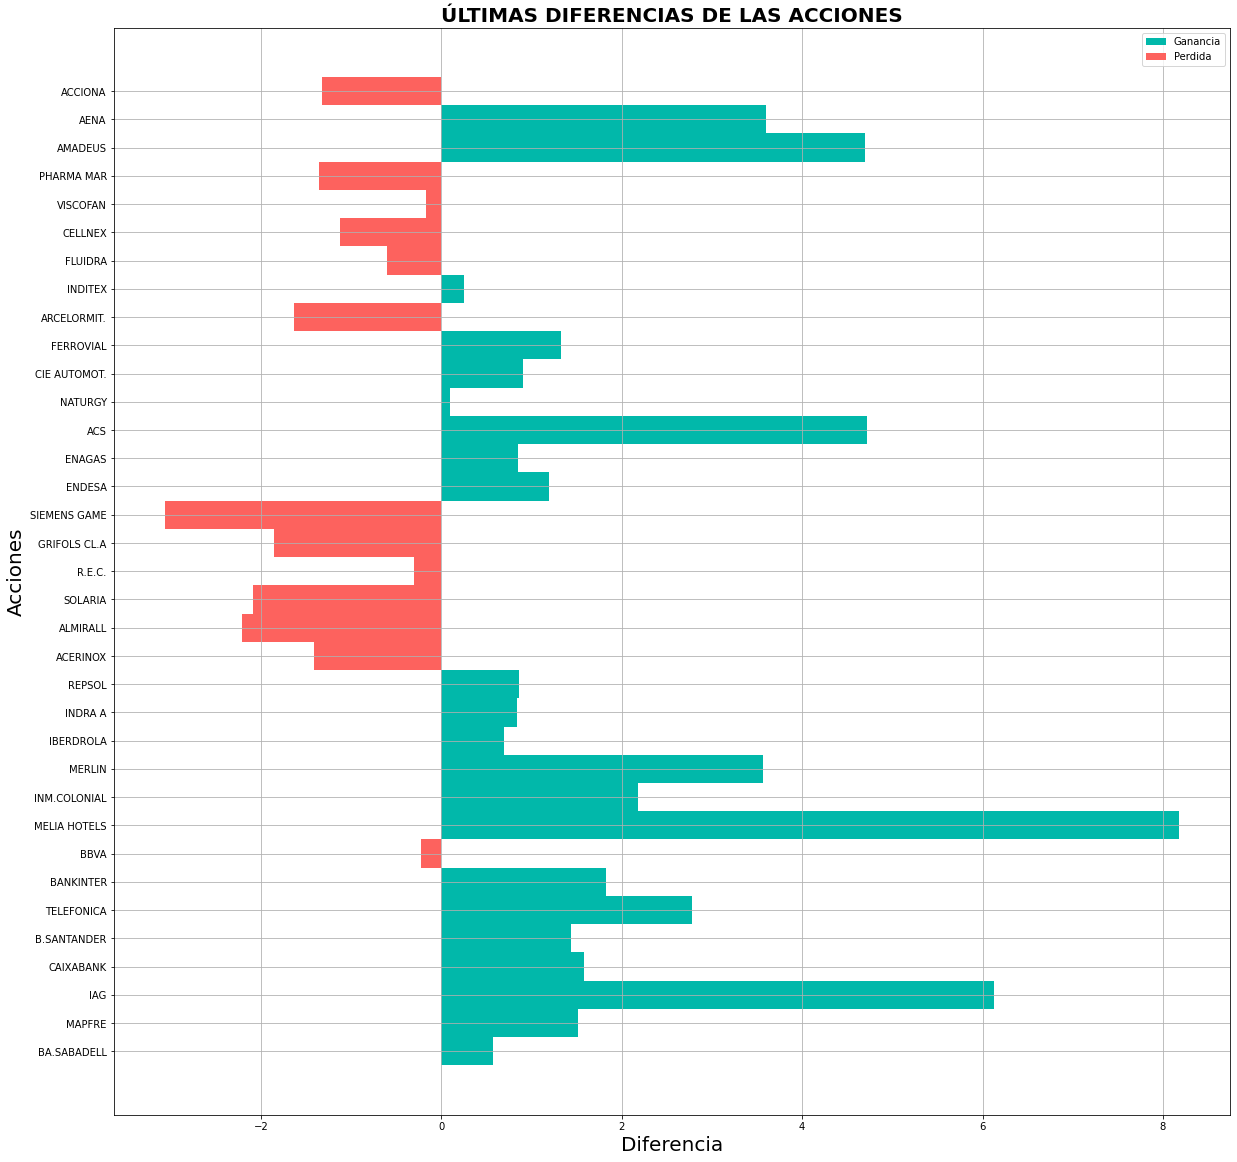

In [8]:
x = df['Accion']
y = df['Diferencia']

plt.figure(figsize=(20,20))

mayG = df['Diferencia']  > 0
mayP = df['Diferencia'] <= 0

mY=plt.barh(x, y, mayG, color='#01b8aa', label="Ganancia")
my=plt.barh(x, y, mayP, color='#fd625e', label="Perdida")

plt.ylabel('Acciones',fontsize=20)
plt.xlabel('Diferencia',fontsize=20)
plt.title('ÚLTIMAS DIFERENCIAS DE LAS ACCIONES',fontsize=20, fontweight='bold')
plt.legend()
plt.grid()
plt.show();